# 1. 封装函数file_name打开的文件名
## data是csv倒入时的数据集
## data_rfe在后面会有，是rfe特征选择后的总数据集
## t是rfe特征选择后的特征数据
## target是rfe特征选择后的目标数据

In [1]:
#打开csv并存到data中
def file_name(name):
    import pandas as pd
    import numpy as np
    import re
    from sklearn import preprocessing
    from sklearn.feature_selection import RFE,RFECV
    from sklearn.feature_selection import VarianceThreshold,f_classif
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.feature_selection import VarianceThreshold
    global data
    data = pd.read_csv(name)
    display(data)

#画所有列分布的柱状图
def hist():    
    %matplotlib inline
    import matplotlib.pyplot as plt
    # 绘制柱状图，其中bins设置为50
    data.hist(bins=50, figsize=(20,15))
    plt.tight_layout()
    plt.savefig('./hist_allFeatures.png', dpi=300, bbox_inches = 'tight')
    plt.show()

,A apol,A AMR,A nH,A nC,A nN,A nO,A nS,A MW,A nBondsD,A nBonds,...,B ETA_dEpsilon_A,B ETA_dAlpha_B,B ETA_BetaP,B FMF,B fragC,B HOMO,B LOMO,B Bandgap,Time (s),Potential (v)
0,61.763032,117.2234,24,21,8,0,0,388.212393,11,31,...,0.33184,0.03222,1.45833,0.428571,685.26,-5.259,-5.033,0.226,15,0.2467
1,61.763032,117.2234,24,21,8,0,0,388.212393,11,31,...,0.33184,0.03222,1.45833,0.428571,685.26,-5.259,-5.033,0.226,35,0.2481
2,61.763032,117.2234,24,21,8,0,0,388.212393,11,31,...,0.33184,0.03222,1.45833,0.428571,685.26,-5.259,-5.033,0.226,55,0.2380
3,61.763032,117.2234,24,21,8,0,0,388.212393,11,31,...,0.33184,0.03222,1.45833,0.428571,685.26,-5.259,-5.033,0.226,75,0.2292
4,61.763032,117.2234,24,21,8,0,0,388.212393,11,31,...,0.33184,0.03222,1.45833,0.428571,685.26,-5.259,-5.033,0.226,95,0.2200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,44.469516,90.6166,12,16,2,4,1,328.051778,11,25,...,0.30944,0.02396,1.53125,0.528736,1009.24,-5.040,-4.830,0.210,15,0.2517
386,44.469516,90.6166,12,16,2,4,1,328.051778,11,25,...,0.30944,0.02396,1.53125,0.528736,1009.24,-5.040,-4.830,0.210,35,0.2537
387,44.469516,90.6166,12,16,2,4,1,328.051778,11,25,...,0.30944,0.02396,1.53125,0.528736,1009.24,-5.040,-4.830,0.210,55,0.2463
388,44.469516,90.6166,12,16,2,4,1,328.051778,11,25,...,0.30944,0.02396,1.53125,0.528736,1009.24,-5.040,-4.830,0.210,75,0.2390


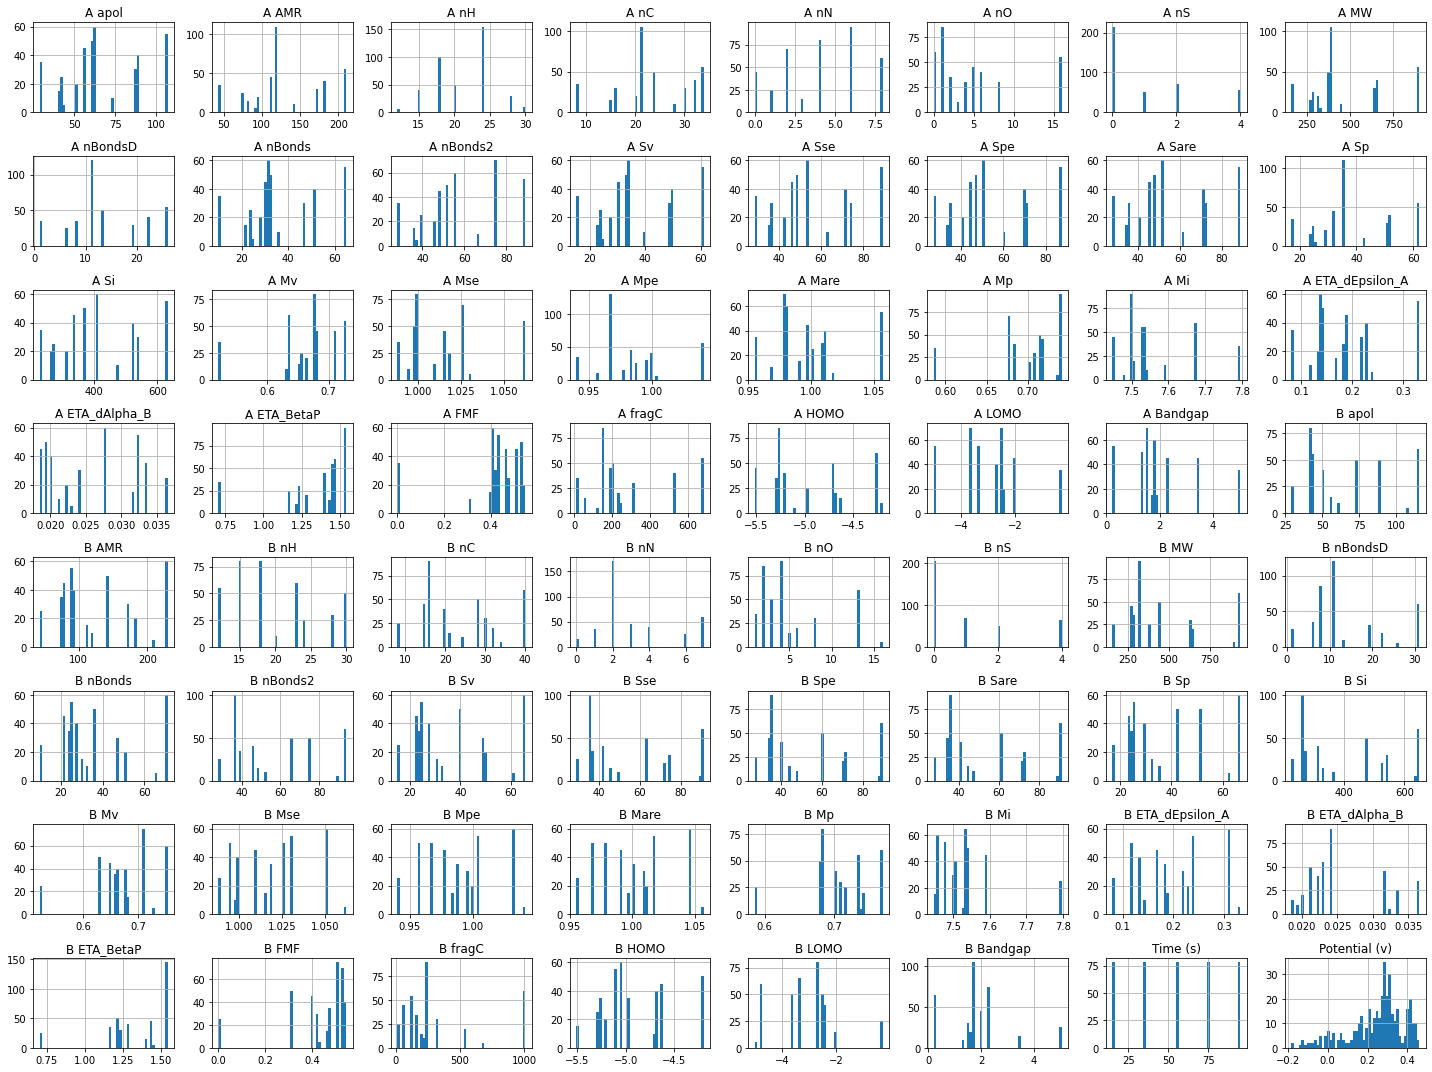

In [2]:
file_name('train1.csv') #打开csv并存到data中
hist()  #画所有列分布的柱状图，例如potential 在0.3 V最多

# 2. 封装函数特征选择之前heatmap画热图

In [3]:
def heatmap_before():
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    featureData=data.iloc[:,:]
    global corMat
    corMat = pd.DataFrame(featureData.corr())  #corr 求相关系数矩阵
    corMat.to_csv('./heatmap-before.csv')
    plt.figure(figsize=(20, 30))
    sns.heatmap(corMat, annot=False, vmax=1, square=True, cmap="Blues",linewidths=0)
    plt.savefig('./heatmap-before.png', dpi=300, bbox_inches = 'tight')
    plt.show()
    return 

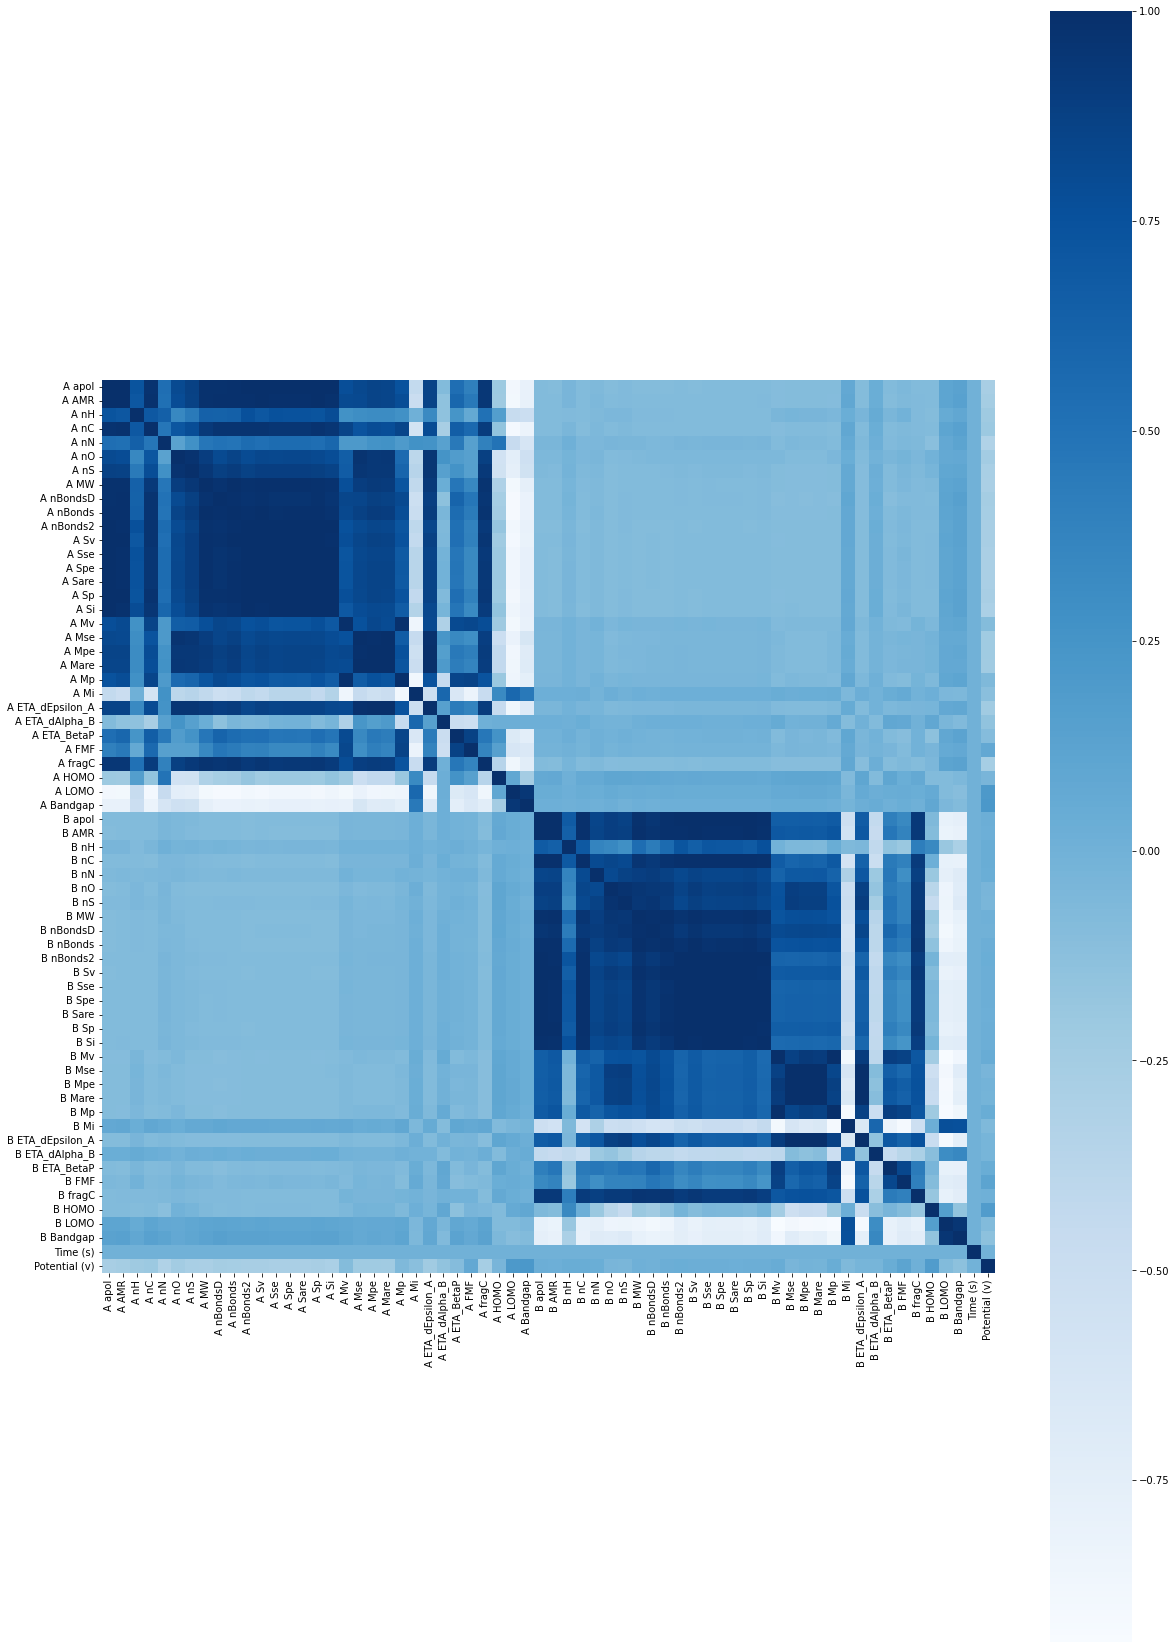

In [4]:
heatmap_before() #画封装函数特征选择之前heatmap热图

# 3. rfe特征选择

In [5]:
def feature_select(remain_number,index_delete):
    #使用随机森林的rfe:RandomForestRegressor()
    #输入数据归一化
    from sklearn import preprocessing
    from sklearn.feature_selection import RFE,RFECV
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import RandomForestRegressor
    import pandas as pd

    X=data.values[:,:-1] 
    for i in range(X.shape[1]):
        X[:,[i]] = preprocessing.MinMaxScaler().fit_transform(X[:,[i]])   
    y=data.values[:,-1] #目标数值

    #rfe步骤
    model=RandomForestRegressor()
    rfe=RFE(estimator=model,n_features_to_select=remain_number,step=1)
    rfe_X=rfe.fit_transform(X,y)
    print("特征是否被选中：\n",rfe.support_)
    print("获取的数据特征尺寸:",rfe_X.shape)

    #打印rfe后的特征，但可能包含空值
    import pandas as pd
    Features_0=pd.DataFrame(data=data.iloc[:,:-1].columns,columns=['Features'])
    Features_0
    Features_rfe=pd.DataFrame(data=rfe.support_,columns=['whether selected'])
    Features_rfe
#     pd.options.display.max_rows=None
    p= pd.concat([Features_0, Features_rfe], axis=1)
    q = p['Features'] * p['whether selected']
    r = pd.concat([p, q], axis=1)
    r.rename(columns={0:'remain'},inplace=True)
    s = pd.DataFrame(r.remain)
    s = s.drop_duplicates()
    print("含有空白值的不重复特征前10行:",s)
    s

    #打印rfe后的特征t
    s = s.drop(axis=0,index=index_delete) #注意检查上一步骤删除空的是否应该index=0
    s = s.reset_index(drop=True)
    global t 
    t = pd.DataFrame(data=data,columns=s.remain.values)
    global target
    target = pd.DataFrame(data=data,columns=['Potential (v)'])
    print("最后的删除空白值的特征:",t)
    print("target:", target)
    

In [6]:
feature_select(23,0) #第一个为剩的特征个数，第二个一般都为0

特征是否被选中：
 [False False False False  True  True False  True False False False False
  True False False False  True  True  True False False False False False
  True  True  True False False  True  True False False  True False  True
 False False False False False False False False False False False False
 False False  True False  True  True False  True  True False  True  True
 False  True  True]
获取的数据特征尺寸: (390, 23)
含有空白值的不重复特征前10行:             remain
0                 
4             A nN
5             A nO
7             A MW
12           A Sse
16            A Si
17            A Mv
18           A Mse
24  A ETA_dAlpha_B
25     A ETA_BetaP
26           A FMF
29          A LOMO
30       A Bandgap
33            B nH
35            B nN
50           B Mpe
52            B Mp
53            B Mi
55  B ETA_dAlpha_B
56     B ETA_BetaP
58         B fragC
59          B HOMO
61       B Bandgap
62        Time (s)
最后的删除空白值的特征:      A nN  A nO        A MW      A Sse        A Si      A Mv    A Mse  \
0     

# 4. 画rfe特征选择后的热图

In [7]:
def heatmap_afterRFE():
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    t_corMat = pd.DataFrame(t.corr())  #corr 求相关系数矩阵
    t_corMat.to_csv('./heatmap-afterRFE.csv')
    plt.figure(figsize=(20, 30))
    sns.heatmap(t_corMat, annot=False, vmax=1, square=True, cmap="Blues",linewidths=0)
    plt.savefig('./heatmap-afterRFE.png', dpi=300, bbox_inches = 'tight')
    plt.show()

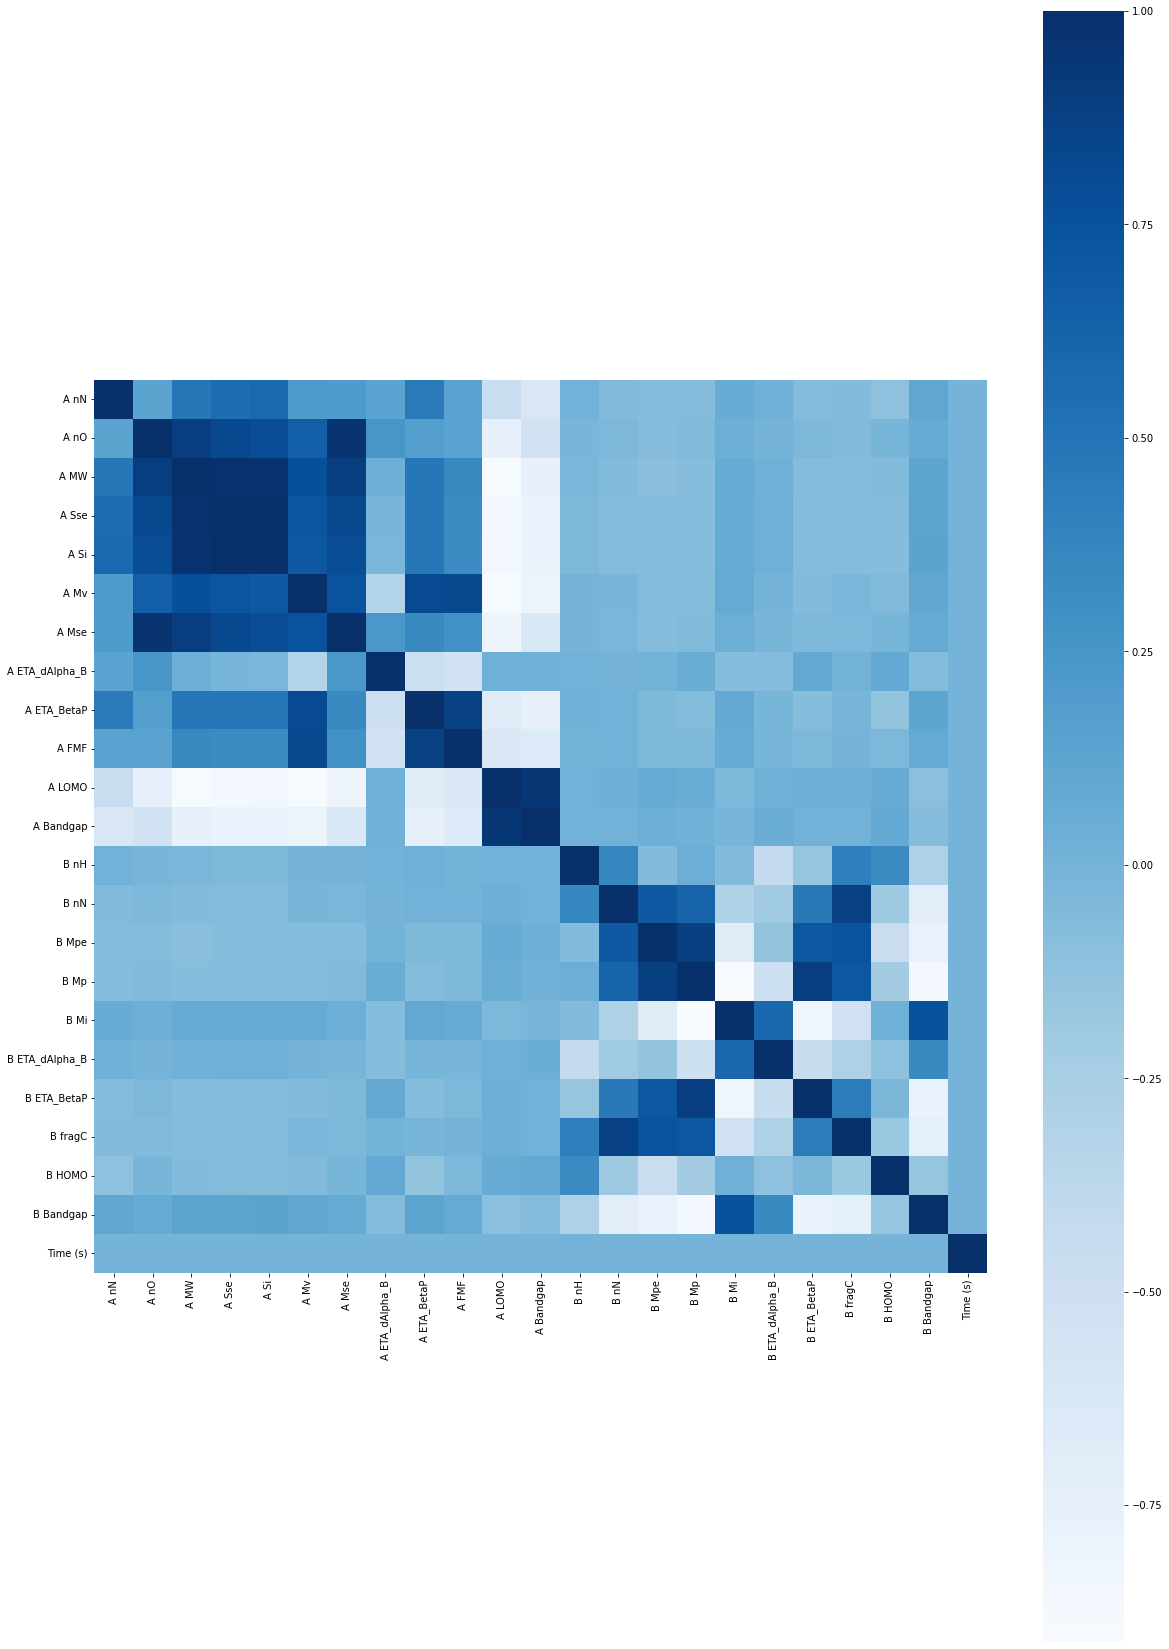

In [8]:
heatmap_afterRFE()

# 5  重要性排名（皮尔逊系数）

## 5.1 特征选择之前所有特征的重要性

In [9]:
def FeatureImportance_before(rotationDeg,fontsize_axis,figure_size_xaxis,figure_size_yaxis):
    import pandas as pd
    FirstLine=corMat.iloc[-1,:]
    FirstLine=pd.DataFrame(FirstLine)
    FirstLine_Del_Target=FirstLine.iloc[:-1,:]
    importance=FirstLine_Del_Target.sort_values(by="Potential (v)",ascending=False)
    display(importance)

    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif']=['Times New Roman']
    # plt.rcParams ['font.sans-serif'] ='SimHei'    #显示中文
    plt.rcParams ['axes.unicode_minus']=False    #显示负号 
    %matplotlib inline
    importance.plot(kind='bar', figsize=(figure_size_xaxis,figure_size_yaxis), rot=rotationDeg, fontsize=8)  #colormap='rainbow'
    plt.savefig('./FeatureImportance_before.png', dpi=300, bbox_inches = 'tight')
    plt.show()

,Potential (v)
A Bandgap,0.211101
A LOMO,0.205916
B HOMO,0.182810
B FMF,0.119378
A FMF,0.077269
...,...
A Sse,-0.288294
A Spe,-0.288845
A Sare,-0.289623
A Si,-0.290177


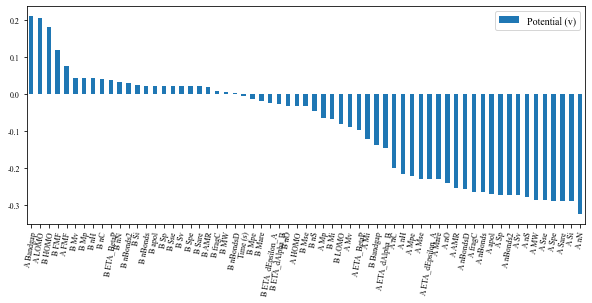

In [10]:
FeatureImportance_before(80,8,10,4)  #rotation=80, fontsize=8, figure_size_xaxis=10,figure_size_yaxis=4

## 5.2 特征选择之后的个别特征的重要性

In [11]:
def FeatureImportance_afterRFE(rotationDeg,fontsize_axis,figure_size_xaxis,figure_size_yaxis):
    import pandas as pd
    global data_rfe
    data_rfe = pd.concat([t,target],axis=1)
    corMat_rfe = pd.DataFrame(data_rfe.corr())  #corr 求相关系数矩阵
    
    FirstLine_rfe=corMat_rfe.iloc[-1,:]
    FirstLine_rfe=pd.DataFrame(FirstLine_rfe)
    FirstLine_rfe_Del_Target=FirstLine_rfe.iloc[:-1,:]
    importance_rfe=FirstLine_rfe_Del_Target.sort_values(by="Potential (v)",ascending=False)
    display(importance_rfe)

    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif']=['Times New Roman']
    # plt.rcParams ['font.sans-serif'] ='SimHei'    #显示中文
    plt.rcParams ['axes.unicode_minus']=False    #显示负号 
    %matplotlib inline
    importance_rfe.plot(kind='bar', figsize=(figure_size_xaxis,figure_size_yaxis), rot=rotationDeg, fontsize=8)  #colormap='rainbow'
    plt.savefig('./FeatureImportance_after.png', dpi=300, bbox_inches = 'tight')
    plt.show()

,Potential (v)
A Bandgap,0.211101
A LOMO,0.205916
B HOMO,0.182810
A FMF,0.077269
B Mp,0.043759
B nH,0.042617
B ETA_BetaP,0.038663
B nN,0.032917
B fragC,0.009570
Time (s),-0.006015


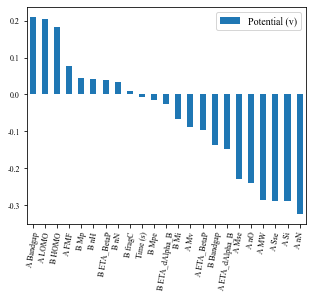

In [12]:
FeatureImportance_afterRFE(80,12,5,4) #rotation=80, fontsize=12, figure_size_xaxis=5,figure_size_yaxis=4

# 6  机器学习建模

# 6.1 xgboost默认超参数建模画图
#### (n_estimators=2000, max_depth=100, eta=0.1, gamma=0,  
#### subsample=0.9, colsample_bytree=0.9, learning_rate=0.2)

In [13]:
def xgboost_default():                             
    # 数据切分
    import matplotlib.pyplot as plot
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn import svm
    import numpy as np
    import pandas as pd
    from sklearn import preprocessing
    from pandas import DataFrame
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import ExtraTreesRegressor
    from sklearn.linear_model import LogisticRegression
    from sklearn.gaussian_process import GaussianProcessRegressor
    from sklearn.gaussian_process.kernels import RBF
    from sklearn.model_selection import KFold
    from sklearn.metrics import roc_curve
    from sklearn.metrics import confusion_matrix
    from gplearn import genetic
    from gplearn.genetic import SymbolicTransformer
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error
    from scipy.stats import pearsonr
    from scipy.stats import stats
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    from sklearn.metrics import r2_score
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from imblearn.over_sampling import RandomOverSampler, SMOTE
    from collections import Counter
    from sklearn.model_selection import train_test_split
    import sklearn.ensemble as ensemble  # ensemble learning: 集成学习
    from sklearn.model_selection import GridSearchCV
    import sklearn.metrics as metrics
    import matplotlib.pyplot as plt#计算准确率xgboost
    from xgboost import XGBRegressor
    from numpy import absolute
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import RepeatedKFold
    from sklearn.model_selection import train_test_split

    X = t
    y = target
    X = X.values[:, :]
    y = y.values[:, :]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


    # 数据归一化
    for i in range(X_train.shape[1]):
        X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])

    for i in range(X_test.shape[1]):
        X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

    #xgboost建模
    from xgboost import XGBRegressor
    from numpy import absolute
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import RepeatedKFold

    clf = XGBRegressor(n_estimators=2000, max_depth=100, eta=0.1, gamma=0,  
                       subsample=0.9, colsample_bytree=0.9, learning_rate=0.2)
    clf.fit(X_train, y_train)
    y_prediction=clf.predict(X_test)

    # 打印准确率
    mse = mean_squared_error(y_test, y_prediction)
    rmse = mse ** (1/2)

    from sklearn.metrics import mean_absolute_error
    MAE = mean_absolute_error(y_test, y_prediction)

    print("RMSE:",rmse)
    # print("r:",pearsonr(y_test, y_prediction))
    print("MAE:",MAE)

    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    R2 = r2_score(y_test, y_prediction)
    MSE = mean_squared_error(y_test, y_prediction)
    print("R2:",R2)
    print("MSE:",MSE)

    #plot图
    plt.yticks(fontproperties = 'Times New Roman', size = 14)
    plt.xticks(fontproperties = 'Times New Roman', size = 14)
    plt.rcParams['font.sans-serif'] = 'Roman'
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.plot(y_test, y_test, label='Real Data')
    plt.scatter(y_test, y_prediction, label='Predict', c='r')
    ax=plt.gca()
    ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
    ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
    ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
    ax.spines['top'].set_linewidth(2)

    plt.tick_params(width=2)
    ax.xaxis.set_tick_params(labelsize=24)
    plt.tick_params(which='major',length=8)
    plt.tick_params(which='minor',length=4,width=2)
    ax.yaxis.set_tick_params(labelsize=24)
    xminorLocator   = MultipleLocator(1000)
    yminorLocator   = MultipleLocator(1000)
    ax.xaxis.set_minor_locator(xminorLocator)
    ax.yaxis.set_minor_locator(yminorLocator)
    plt.minorticks_on()

    plt.xlabel("True", fontproperties = 'Times New Roman', size = 20)
    plt.ylabel("Prediction", fontproperties = 'Times New Roman', size = 20)

    plt.text(.05, .2, 'MAE = %.3f \nMSE =  %.3f \nR2 =  %.3f \n' % (MAE, MSE, R2), fontproperties = 'Times New Roman', size = 20, horizontalalignment='center')
    plt.savefig('xgboost-default.tif', dpi=300, bbox_inches = 'tight')
    plt.show()

RMSE: 0.05193826756606813
MAE: 0.028271205905082877
R2: 0.8301134853212927
MSE: 0.0026975836377644852


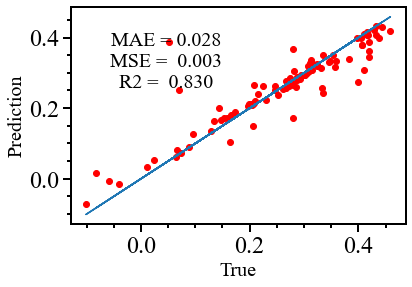

In [14]:
xgboost_default()

## 6.1 xgboost自己修改超参数, 建模
#### 画图得到拟合图以及交叉验证图
#### (n_estimators=2000xxx, max_depth=100xxx, eta=0.1xxx, gamma=0xxx,
#### subsample=0.9xxx, colsample_bytree=0.9xxx, learning_rate=0.2xxx)

In [15]:
def xgboost_modify(a,b,c,d,e,f,g):                             
    # 数据切分
    import matplotlib.pyplot as plot
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn import svm
    import numpy as np
    import pandas as pd
    from sklearn import preprocessing
    from pandas import DataFrame
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import ExtraTreesRegressor
    from sklearn.linear_model import LogisticRegression
    from sklearn.gaussian_process import GaussianProcessRegressor
    from sklearn.gaussian_process.kernels import RBF
    from sklearn.model_selection import KFold
    from sklearn.metrics import roc_curve
    from sklearn.metrics import confusion_matrix
    from gplearn import genetic
    from gplearn.genetic import SymbolicTransformer
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error
    from scipy.stats import pearsonr
    from scipy.stats import stats
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    from sklearn.metrics import r2_score
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from imblearn.over_sampling import RandomOverSampler, SMOTE
    from collections import Counter
    from sklearn.model_selection import train_test_split
    import sklearn.ensemble as ensemble  # ensemble learning: 集成学习
    from sklearn.model_selection import GridSearchCV
    import sklearn.metrics as metrics
    import matplotlib.pyplot as plt#计算准确率xgboost
    from xgboost import XGBRegressor
    from numpy import absolute
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import RepeatedKFold
    from sklearn.model_selection import train_test_split

    X = t
    y = target
    X = X.values[:, :]
    y = y.values[:, :]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


    # 数据归一化
    for i in range(X_train.shape[1]):
        X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])

    for i in range(X_test.shape[1]):
        X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

    #xgboost建模
    from xgboost import XGBRegressor
    from numpy import absolute
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import RepeatedKFold

    clf = XGBRegressor(n_estimators=a, max_depth=b, eta=c, gamma=d,  
                       subsample=e, colsample_bytree=f, learning_rate=g)
    clf.fit(X_train, y_train)
    y_prediction=clf.predict(X_test)

    # 打印准确率
    mse = mean_squared_error(y_test, y_prediction)
    rmse = mse ** (1/2)

    from sklearn.metrics import mean_absolute_error
    MAE = mean_absolute_error(y_test, y_prediction)

    print("RMSE:",rmse)
    # print("r:",pearsonr(y_test, y_prediction))
    print("MAE:",MAE)

    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    R2 = r2_score(y_test, y_prediction)
    MSE = mean_squared_error(y_test, y_prediction)
    print("R2:",R2)
    print("MSE:",MSE)

    #plot图
    plt.yticks(fontproperties = 'Times New Roman', size = 14)
    plt.xticks(fontproperties = 'Times New Roman', size = 14)
    plt.rcParams['font.sans-serif'] = 'Roman'
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.plot(y_test, y_test, label='Real Data')
    plt.scatter(y_test, y_prediction, label='Predict', c='r')
    ax=plt.gca()
    ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
    ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
    ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
    ax.spines['top'].set_linewidth(2)

    plt.tick_params(width=2)
    ax.xaxis.set_tick_params(labelsize=24)
    plt.tick_params(which='major',length=8)
    plt.tick_params(which='minor',length=4,width=2)
    ax.yaxis.set_tick_params(labelsize=24)
    xminorLocator   = MultipleLocator(1000)
    yminorLocator   = MultipleLocator(1000)
    ax.xaxis.set_minor_locator(xminorLocator)
    ax.yaxis.set_minor_locator(yminorLocator)
    plt.minorticks_on()

    plt.xlabel("True", fontproperties = 'Times New Roman', size = 20)
    plt.ylabel("Prediction", fontproperties = 'Times New Roman', size = 20)

    plt.text(.05, .2, 'MAE = %.3f \nMSE =  %.3f \nR2 =  %.3f \n' % (MAE, MSE, R2), fontproperties = 'Times New Roman', size = 20, horizontalalignment='center')
    plt.savefig('xgboost-modify.tif', dpi=300, bbox_inches = 'tight')
    plt.show()
    
    
   #使用KFold交叉验证建模
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn import datasets
    from sklearn.model_selection import cross_val_score
    
    kfold = KFold(n_splits=10)
    scores = cross_val_score(clf, X_train, y_train, scoring='r2',cv=kfold)
    #scoring='neg_mean_squared_error'
    print(scores)
    
    #使用KFold交叉验证plot图
    plt.yticks(fontproperties = 'Times New Roman', size = 14)
    plt.xticks(fontproperties = 'Times New Roman', size = 14)
    plt.rcParams['font.sans-serif'] = 'Roman'
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.plot(range(1,11), scores, c='r')
    plt.scatter(range(1,11), scores, c='r')
#     ax=plt.gca()
    ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
    ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
    ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
    ax.spines['top'].set_linewidth(2)
    plt.tick_params(width=2)
    ax.xaxis.set_tick_params(labelsize=24)
    plt.tick_params(which='major',length=8)
    plt.tick_params(which='minor',length=4,width=2)
    ax.yaxis.set_tick_params(labelsize=24)
#     xminorLocator   = MultipleLocator(1000)
#     yminorLocator   = MultipleLocator(1000)
    ax.xaxis.set_minor_locator(xminorLocator)
    ax.yaxis.set_minor_locator(yminorLocator)
    x_major_locator=MultipleLocator(1) #把x轴的刻度间隔设置为1，并存在变量里
    ax.xaxis.set_major_locator(x_major_locator) #把x轴的主刻度设置为1的倍数
    y_major_locator=MultipleLocator(0.2) #把y轴的刻度间隔设置为10，并存在变量里
    ax.yaxis.set_major_locator(y_major_locator) #把y轴的主刻度设置为10的倍数
#     plt.xlim(1.5,9.5)
    plt.ylim(0,1.2)
#     plt.minorticks_on()
    plt.xlabel("k", fontproperties = 'Times New Roman', size = 24)
    plt.ylabel("score", fontproperties = 'Times New Roman', size = 24)
    plt.savefig('10-fold-crossvalidation.png', dpi=300, bbox_inches = 'tight')
    plt.show()

RMSE: 0.054446273049900115
MAE: 0.03129198568066772
R2: 0.8133103241813396
MSE: 0.00296439664902428


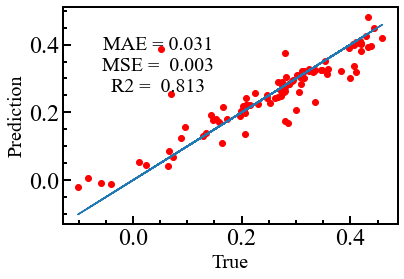

[0.574469   0.87518093 0.89666025 0.94743888 0.92722372 0.90085041
 0.87926467 0.66614206 0.89906653 0.86024211]


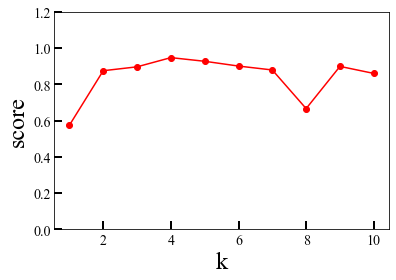

In [16]:
xgboost_modify(1000,200,0.2,0,0.9,0.8,0.2)

#(n_estimators=1000, max_depth=200, eta=0.2, gamma=0,  
#                       subsample=0.9, colsample_bytree=0.9, learning_rate=0.2)

# 未完待续（其他机器学习算法，网格搜索，预测集建立，描述符填充等等）